# **Simple Data Process**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class dataProcess:
    def __init__(self, data_path):
        """
        Initialize the dataProcess with given path

        Parameters :
          - data_path (str) : the path of dataset
        Attributes :
          - data_path (str) : path of dataset
          - result : None
          - df (DataFrame) : dataframe after reading data
          - shape (tuple) : (# rows, # cols)
          - columns (Index) : features of datasets
        """
        self.data_path = data_path
        self.result = None
        self.df = self.read_file()
        self.shape = self.df.shape
        self.columns = self.df.columns

    def get_extension(self):
        '''
         Extract the file extension from the data_path
         Returns :
           - file extension
         '''
        return self.data_path.split(".")[-1]

    def read_file(self):
        """
        Reads files with extensions: json, csv, or excel.
        No Parameter
        Returns :
          - df : dataframe after reading datset
        """
        extension = self.get_extension()
        try:
            if extension == "csv":
                df = pd.read_csv(self.data_path)
            elif extension == "json":
                df = pd.read_json(self.data_path)
            else:
                df = pd.read_excel(self.data_path)
            return df
        except Exception as e:
            # Raise an error if there is an issue reading the file
            raise ValueError(f"Error reading file: {str(e)}")

    def show_df(self, rows=5):
        '''
         Display the first rows of the DataFrame

         Parameters :
           - rows : number of rows of df you want to show
         Returns :
           - First (rows)- rows of data
         '''
        return self.df.head(rows)

    def describe_df(self):
        '''
        Generate descriptive statistics of the DataFrame

        No Parameter
        Returns :
         - Some statistics measures as mean, median,...etc.
        '''
        return self.df.describe()

    def info_df(self):
        '''
        Display information about the DataFrame

        No Parameter
        Returns :
          - Data Info : as dtypes, cols, # non-missing entries
        '''
        return self.df.info()

    def num_missingValues(self):
        '''
        Count the number of missing values in each column
        No Parametes
        Returns :
         - Number Of Misiing values

        '''
        return self.df.isna().sum()

    def handle_missing(self):
        '''
        Handle missing values in the DataFrame
        for Numerical : Median
        for categorical : Mode
        '''

        # Get the columns with missing values
        missing_cols = self.df.columns[self.df.isnull().any()].tolist()

        # Fill missing values based on data type of each column
        for col in missing_cols:
            if self.df[col].dtype in ["int64", "float64"]:
                # For numerical columns, fill with median
                self.df[col] = self.df[col].fillna(self.df[col].median())
            elif self.df[col].dtype in ["object", "bool"]:
                # For categorical columns, fill with mode
                mode_value = self.df[col].mode()[0]
                self.df[col] = self.df[col].fillna(mode_value)


class dataVis:
    def plot_histogram(self, data, title="", xlabel="", ylabel="Frequency", bins=10, edgecolor='black'):
        """
        Generate a histogram plot.

        Parameters:
        - self: instance of the class
        - data: list or array-like, the data to plot
        - title: str, optional, title of the plot
        - xlabel: str, optional, label for the x-axis
        - ylabel: str, optional, label for the y-axis
        - bins: int or sequence, optional, number of bins or bin edges
        - edgecolor: str, optional, color of the edges of the bars
        """
        plt.hist(data, bins=bins, edgecolor=edgecolor)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

    def plot_countplot(self, data, title="", xlabel="", ylabel="", colors=None):
        """
        Generate a countplot.

        Parameters:
        - self: instance of the class
        - data: list or array-like, the data to plot
        - title: str, optional, title of the plot
        - xlabel: str, optional, label for the x-axis
        - ylabel: str, optional, label for the y-axis
        - colors: list of str, optional, colors for the bars
        """
        sns.countplot(data, palette=colors)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()



# <font color = "fuchsia" > **Main Function Of CSV File**

In [2]:
# @title **Input the Path**

# On collab :
# Enter the path of your dataset: /content/athlete_events.csv
# OR
# Enter the path of your dataset: /content/athlete_events.json
# OR
# Enter the path of your dataset: /content/athlete_events.xslx or other excel file
#
# On your Device :
# e.g >> C:\Users\user\Downloads\Dataset#1.xlsx

# List of supported file extensions
supported_extensions = ["csv", "json", "xls", "xlsx", "xlsm", "xlsb", "xltx", "xltm"]

while True:
    # Ask user to enter the path of the dataset
    path = input("Enter the path of your dataset: ").strip()

    # Remove any leading whitespace and invalid characters from the file path
    path = path.strip().lstrip("\u202a")

    # Extract the file extension from the path
    extension = path.split(".")[-1].lower()

    # Check if the file extension is supported
    if extension not in supported_extensions:
        # If not supported, raise a ValueError
        raise ValueError(f"Unsupported file extension: {extension}. Only JSON, CSV, and Excel files are supported.")
    else:
        # If supported, break the loop
        break


Enter the path of your dataset: /content/athlete_events.csv


In [6]:
#@title **Creating object of dataProcess**
# Create an instance of the dataProcess class with the provided path
dtprocess = dataProcess(path)

In [145]:
#@title **Show Head of Data**

'''
dtprocess.show_df(rows = 8)
you can enter any number of rows until max number
'''

dtprocess.show_df(6)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [146]:
#@title **Shape of Data**
print("# of rows = ", dtprocess.shape[0])
print("# of columns = ", dtprocess.shape[1])

# of rows =  271116
# of columns =  15


In [147]:
print("Columns are : \n", list(dtprocess.columns))

Columns are : 
 ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']


In [148]:
dtprocess.info_df()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [149]:
#@title **Some Statistical Measures**
dtprocess.describe_df()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [150]:
# Check for missing values and handle them if present
if dtprocess.num_missingValues().sum() != 0:
     print("============= Before ==================")
     print(dtprocess.num_missingValues())
     dtprocess.handle_missing()
     print("============= After ===================")
     print(dtprocess.num_missingValues())
else:
    print("The data does not have missing values :) ")

============= Before ==================
ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64
============= After ===================
ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [4]:
#@title **Creating object of dataVis**
# Create an instance of the dataProcess class with the provided path
dtVis = dataVis()

In [7]:
df_csv = dtprocess.read_file()

In [8]:
# Filter numerical variables
num_var = df_csv.select_dtypes(include=["int64", "float"])

# Filter categorical variables
cat_var = df_csv.select_dtypes(exclude=["int64", "float"])

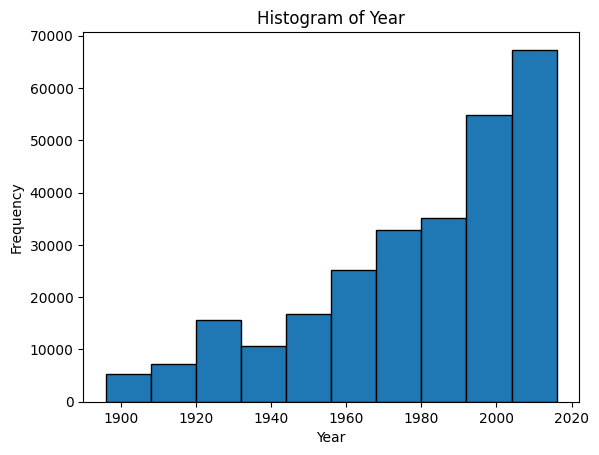

In [153]:
if len(num_var) != 0:
  dtVis.plot_histogram(data = num_var[num_var.columns[-1]], title= f"Histogram of {num_var.columns[-1]}", xlabel= num_var.columns[-1] )

In [19]:
col = cat_var.columns[-1]
col_ind_val = cat_var[col].value_counts()

<ipython-input-1-fbc402e27f84>:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data, palette=colors)


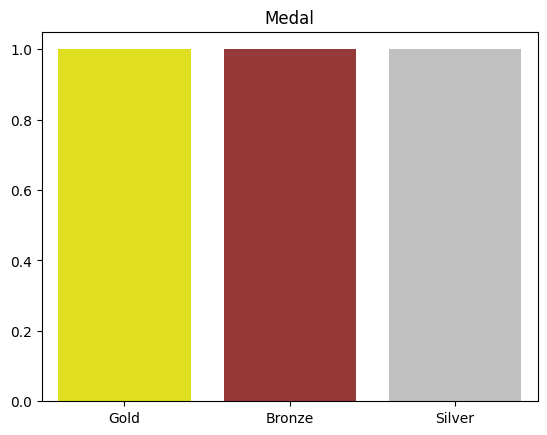

In [20]:
if len(cat_var) != 0:
  dtVis.plot_countplot(data = col_ind_val, title = col, colors = ["yellow", "brown", "silver"])

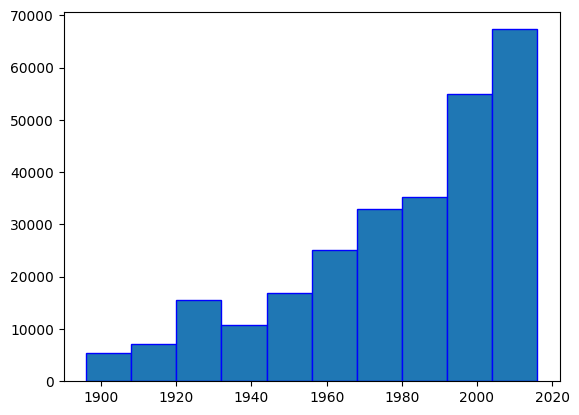

In [133]:
class dataVis:
    def plot_histogram(self, data, title="", xlabel="", ylabel="", bins=10, edgecolor='black'):
        """
        Generate a histogram plot.

        Parameters:
        - self: instance of the class
        - data: list or array-like, the data to plot
        - title: str, optional, title of the plot
        - xlabel: str, optional, label for the x-axis
        - ylabel: str, optional, label for the y-axis
        - bins: int or sequence, optional, number of bins or bin edges
        - edgecolor: str, optional, color of the edges of the bars
        """
        plt.hist(data, bins=bins, edgecolor=edgecolor)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

# Instantiate the class
v = dataVis()

# Call the method with appropriate arguments
if len(num_var.columns) != 0:
    v.plot_histogram(data=num_var[num_var.columns[-1]], edgecolor='blue')


In [121]:
num_var[num_var.columns[-1]]

0         1992
1         2012
2         1920
3         1900
4         1988
          ... 
271111    1976
271112    2014
271113    2014
271114    1998
271115    2002
Name: Year, Length: 271116, dtype: int64

# <font color = "blue" > **Main Function Of Json File**

In [53]:
#@title **Input the Path**

'''
Enter the path of your dataset: /content/athlete_events.csv
OR
Enter the path of your dataset: /content/athlete_events.json
OR
Enter the path of your dataset: /content/athlete_events.xslx or other excel file
'''

# List of supported file extensions
supported_extensions = ["csv", "json", "xls", "xlsx", "xlsm", "xlsb", "xltx", "xltm"]

while True:
    # Ask user to enter the path of the dataset
    path = input("Enter the path of your dataset: ").strip()

    # Remove any leading whitespace and invalid characters from the file path
    path = path.strip().lstrip("\u202a")

    # Extract the file extension from the path
    extension = path.split(".")[-1].lower()

    # Check if the file extension is supported
    if extension not in supported_extensions:
        # If not supported, raise a ValueError
        raise ValueError(f"Unsupported file extension: {extension}. Only JSON, CSV, and Excel files are supported.")
    else:
        # If supported, break the loop
        break




Enter the path of your dataset: /content/sample_data/anscombe.json


In [55]:
#@title **Creating object named dtprocess**
# Create an instance of the dataProcess class with the provided path
dtprocess_json = dataProcess(path)

In [56]:
#@title **Show Head of Data**

'''
dtprocess.show_df(rows = 8)
you can enter any number of rows until max number
'''

dtprocess_json.show_df(6)

,Series,X,Y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33
5,I,14,9.96


In [57]:
#@title **Shape of Data**
print("# of rows = ", dtprocess_json.shape[0])
print("# of columns = ", dtprocess_json.shape[1])

# of rows =  44
# of columns =  3


In [58]:
print("Columns are : \n", list(dtprocess_json.columns))

Columns are : 
 ['Series', 'X', 'Y']


In [59]:
#@title **Some Statistical Measures**
dtprocess_json.describe_df()

,X,Y
count,44.000000,44.000000
mean,9.000000,7.500455
std,3.198837,1.959244
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [60]:
# Check for missing values and handle them if present
if dtprocess_json.num_missingValues().sum() != 0:
     print("============= Before ==================")
     print(dtprocess_json.num_missingValues())
     dtprocess_json.handle_missing()
     print("============= After ===================")
     print(dtprocess_json.num_missingValues())
else:
    print("The data does not have missing values :) ")

The data does not have missing values :) 


# <font color = "green" > **Main Function Of Excel File**

In [69]:
#@title **Input the Path**

'''
Enter the path of your dataset: /content/athlete_events.csv
OR
Enter the path of your dataset: /content/athlete_events.json
OR
Enter the path of your dataset: /content/athlete_events.xslx or other excel file
'''

# List of supported file extensions
supported_extensions = ["csv", "json", "xls", "xlsx", "xlsm", "xlsb", "xltx", "xltm"]

while True:
    # Ask user to enter the path of the dataset
    path = input("Enter the path of your dataset: ").strip()

    # Remove any leading whitespace and invalid characters from the file path
    path = path.strip().lstrip("\u202a")

    # Extract the file extension from the path
    extension = path.split(".")[-1].lower()

    # Check if the file extension is supported
    if extension not in supported_extensions:
        # If not supported, raise a ValueError
        raise ValueError(f"Unsupported file extension: {extension}. Only JSON, CSV, and Excel files are supported.")
    else:
        # If supported, break the loop
        break




Enter the path of your dataset: /content/Dataset#1.xlsx


In [70]:
#@title **Creating object named dtprocess**
# Create an instance of the dataProcess class with the provided path
dtprocess_excel = dataProcess(path)

In [64]:
#@title **Show Head of Data**

'''
dtprocess.show_df(rows = 8)
you can enter any number of rows until max number
'''

dtprocess_excel.show_df(6)

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER


In [71]:
#@title **Shape of Data**
print("# of rows = ", dtprocess_excel.shape[0])
print("# of columns = ", dtprocess_excel.shape[1])

# of rows =  13611
# of columns =  17


In [72]:
print("Columns are : \n", list(dtprocess_excel.columns))

Columns are : 
 ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11', 'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16', 'Class']


In [73]:
#@title **Some Statistical Measures**
dtprocess_excel.describe_df()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13609.000000,13610.000000,13608.000000,13611.000000,13609.000000,13607.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873276,0.799861,0.006564,0.001716,0.643594,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004661,0.059519,0.061719,0.001128,0.000596,0.099009,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832075,0.762446,0.005900,0.001153,0.581320,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883147,0.801260,0.006645,0.001694,0.642051,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916864,0.834270,0.007271,0.002170,0.696017,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [74]:
# Check for missing values and handle them if present
if dtprocess_excel.num_missingValues().sum() != 0:
     print("============= Before ==================")
     print(dtprocess_excel.num_missingValues())
     dtprocess_excel.handle_missing()
     print("============= After ===================")
     print(dtprocess_excel.num_missingValues())
else:
    print("The data does not have missing values :) ")

============= Before ==================
Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     0
Feature8     0
Feature9     0
Feature10    2
Feature11    1
Feature12    3
Feature13    0
Feature14    2
Feature15    4
Feature16    0
Class        0
dtype: int64
============= After ===================
Feature1     0
Feature2     0
Feature3     0
Feature4     0
Feature5     0
Feature6     0
Feature7     0
Feature8     0
Feature9     0
Feature10    0
Feature11    0
Feature12    0
Feature13    0
Feature14    0
Feature15    0
Feature16    0
Class        0
dtype: int64
